In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns


In [2]:

df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")



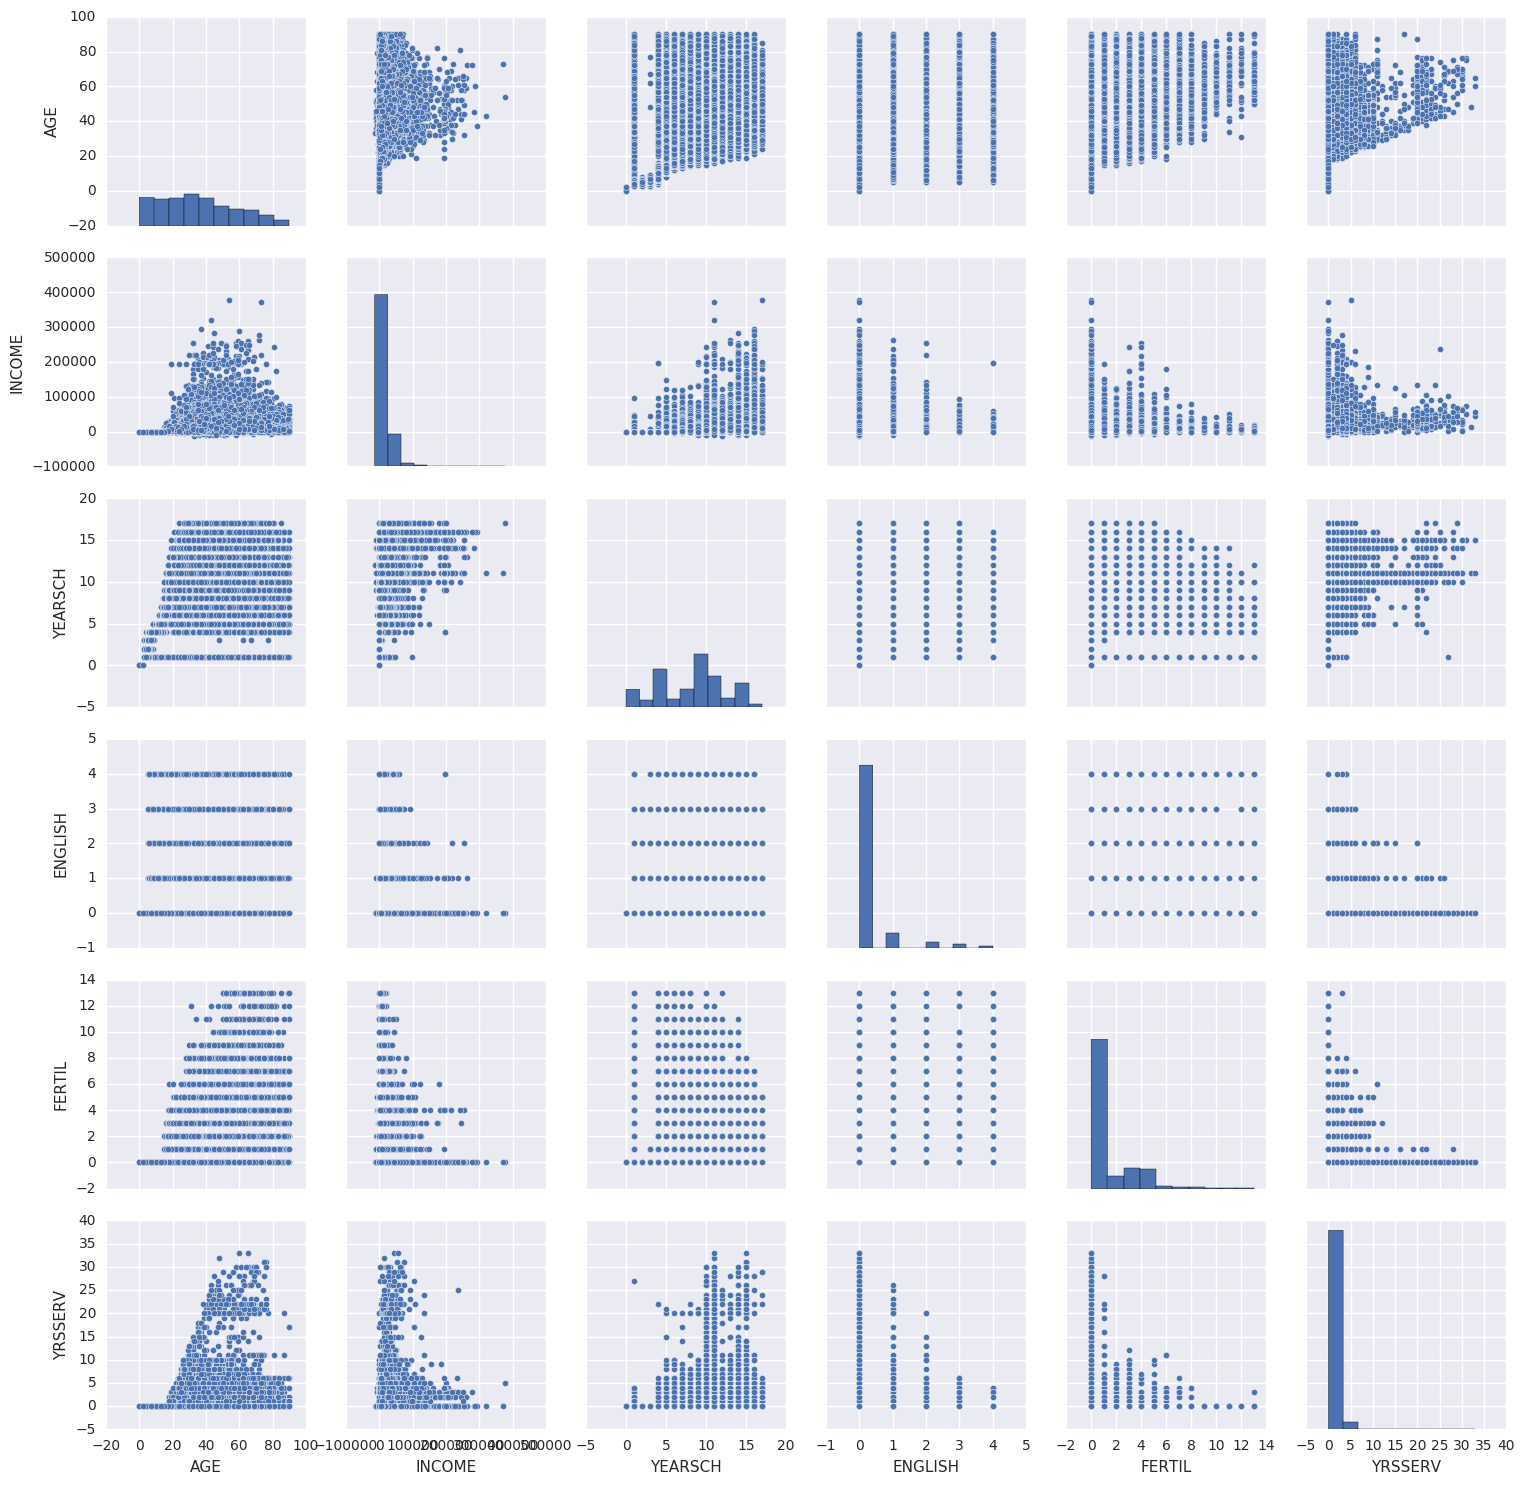

In [3]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



#df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])
#sns.set(style="ticks", color_codes=True)
pairplot_new = sns.pairplot(df_demo)

pairplot_new.savefig("pairplot.png")


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Number of clusters: 2
Silhouette Coefficient: 0.284


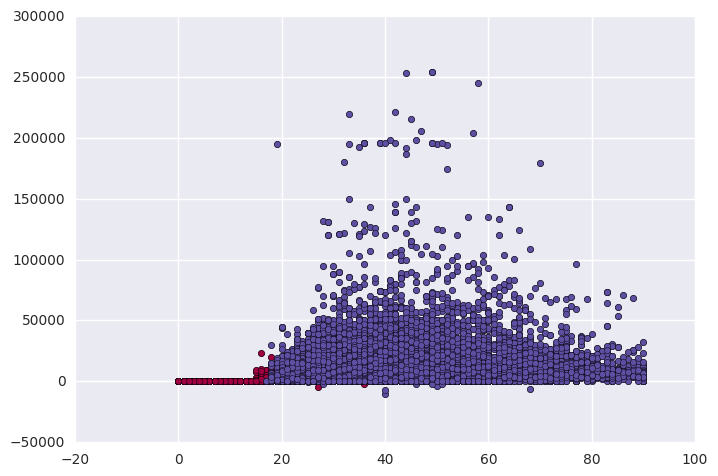

Number of clusters: 3
Silhouette Coefficient: 0.308


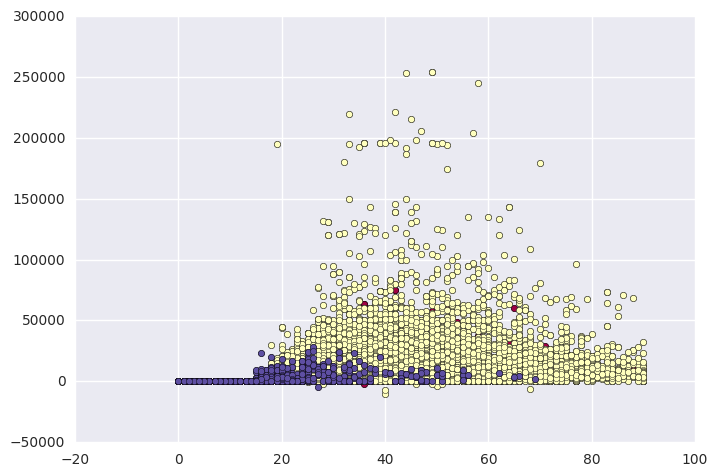

Number of clusters: 4
Silhouette Coefficient: 0.340


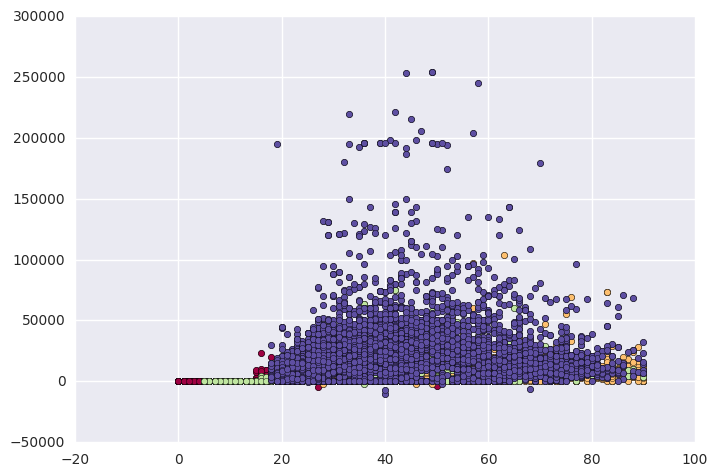

Number of clusters: 5
Silhouette Coefficient: 0.352


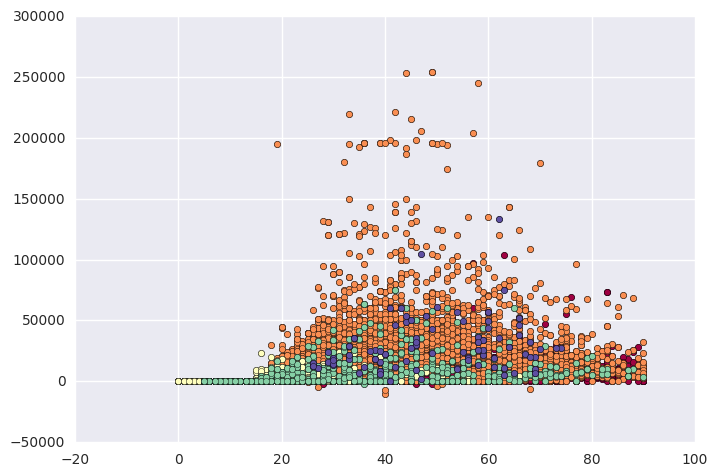

Number of clusters: 6
Silhouette Coefficient: 0.358


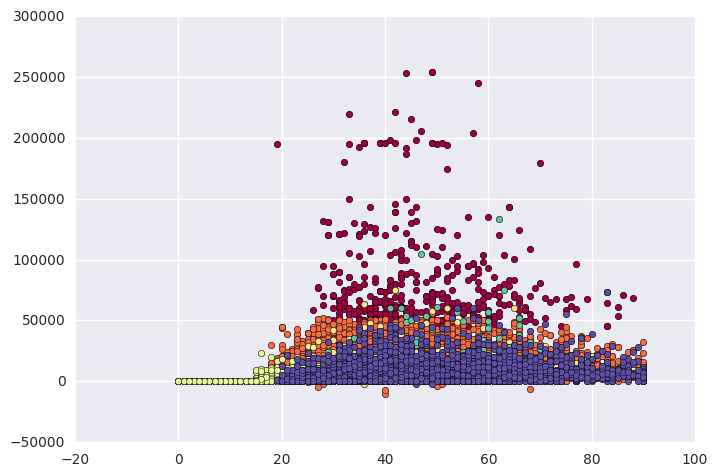

Number of clusters: 7
Silhouette Coefficient: 0.362


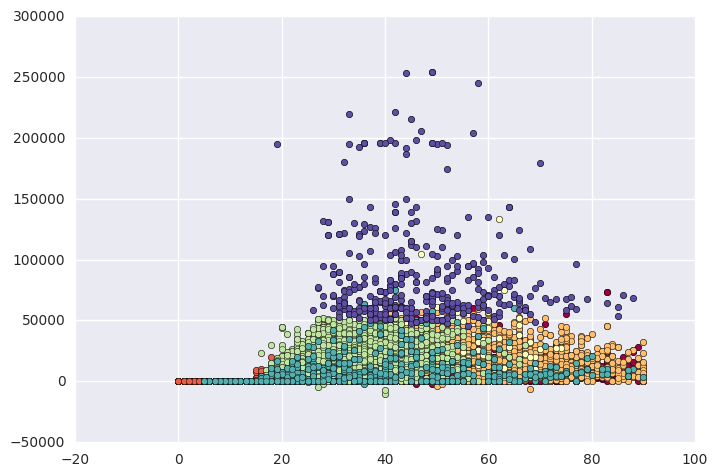

Number of clusters: 8
Silhouette Coefficient: 0.347


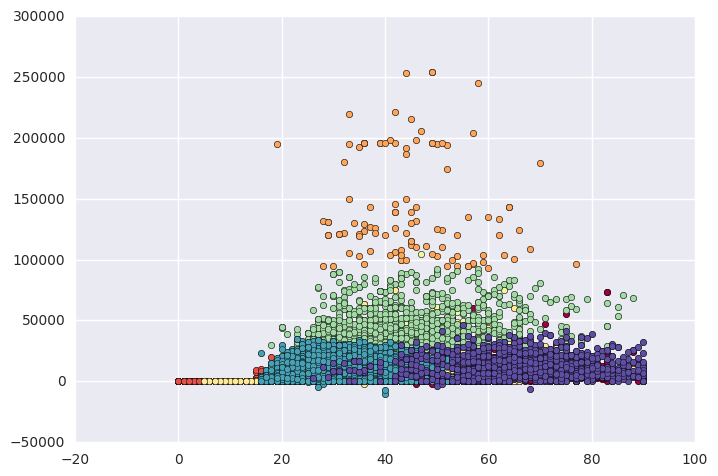

Number of clusters: 9
Silhouette Coefficient: 0.348


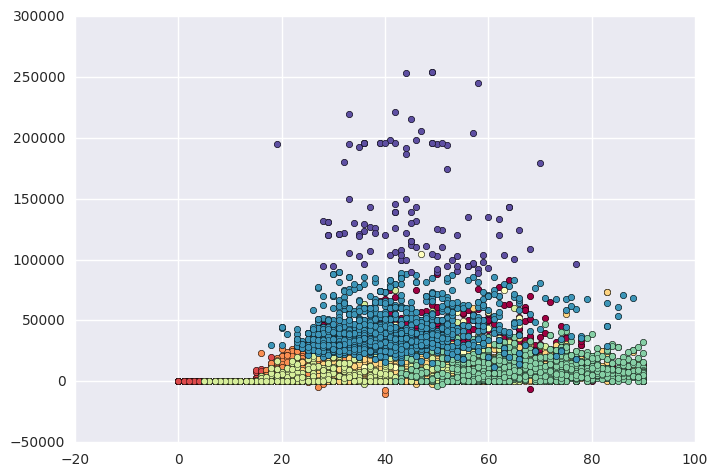

Number of clusters: 10
Silhouette Coefficient: 0.344


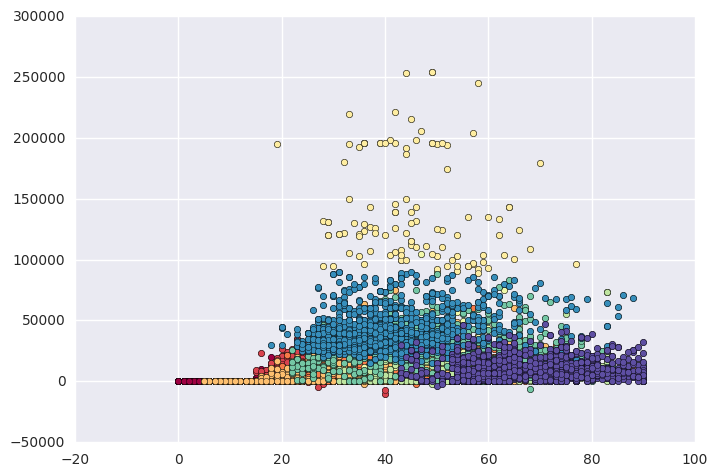

In [4]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)

for i in range(2,11):
    n_clusters = i

    labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




    print('Number of clusters: %d' % n_clusters)

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_db, labels))
    

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
    plt.show()


In [5]:
data = []
for j in range(0,10):  
    X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_db = sc.fit_transform(X)
    for i in range(2,11):
        n_clusters = i
        labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)        
        s_score = metrics.silhouette_score(X_db,labels)
        data.append ([s_score,i])
        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
          % s_score)
        

Number of clusters: 2
Silhouette Coefficient: 0.284
Number of clusters: 3
Silhouette Coefficient: 0.312
Number of clusters: 4
Silhouette Coefficient: 0.343
Number of clusters: 5
Silhouette Coefficient: 0.352
Number of clusters: 6
Silhouette Coefficient: 0.346
Number of clusters: 7
Silhouette Coefficient: 0.351
Number of clusters: 8
Silhouette Coefficient: 0.363
Number of clusters: 9
Silhouette Coefficient: 0.340
Number of clusters: 10
Silhouette Coefficient: 0.338
Number of clusters: 2
Silhouette Coefficient: 0.281
Number of clusters: 3
Silhouette Coefficient: 0.311
Number of clusters: 4
Silhouette Coefficient: 0.342
Number of clusters: 5
Silhouette Coefficient: 0.356
Number of clusters: 6
Silhouette Coefficient: 0.364
Number of clusters: 7
Silhouette Coefficient: 0.363
Number of clusters: 8
Silhouette Coefficient: 0.349
Number of clusters: 9
Silhouette Coefficient: 0.347
Number of clusters: 10
Silhouette Coefficient: 0.341
Number of clusters: 2
Silhouette Coefficient: 0.290
Number of 

[[0.28366886696319099, 2], [0.31166230608660983, 3], [0.34294465349521114, 4], [0.35180671739797442, 5], [0.34577643081331305, 6], [0.35148404389485516, 7], [0.36297809919536056, 8], [0.33972269479979084, 9], [0.33849253811529295, 10], [0.2814721955036909, 2], [0.31114637374292953, 3], [0.34245800703350748, 4], [0.35555071271722044, 5], [0.36404285598587216, 6], [0.36259963021255603, 7], [0.34905490474170658, 8], [0.34702663055750271, 9], [0.34136744288131587, 10], [0.2898106013155895, 2], [0.31088448769033605, 3], [0.34241558833437541, 4], [0.35403063628729897, 5], [0.36482292857013238, 6], [0.36434080400275781, 7], [0.36967504778191723, 8], [0.35268769960089258, 9], [0.34899850552649803, 10], [0.28400862235070501, 2], [0.31345386600390962, 3], [0.34290001070417636, 4], [0.35584781179867886, 5], [0.34685299015510429, 6], [0.35710455012972814, 7], [0.3626962670802194, 8], [0.34724642793879668, 9], [0.34567958406153509, 10], [0.28199819969054596, 2], [0.30501154701092009, 3], [0.3367330

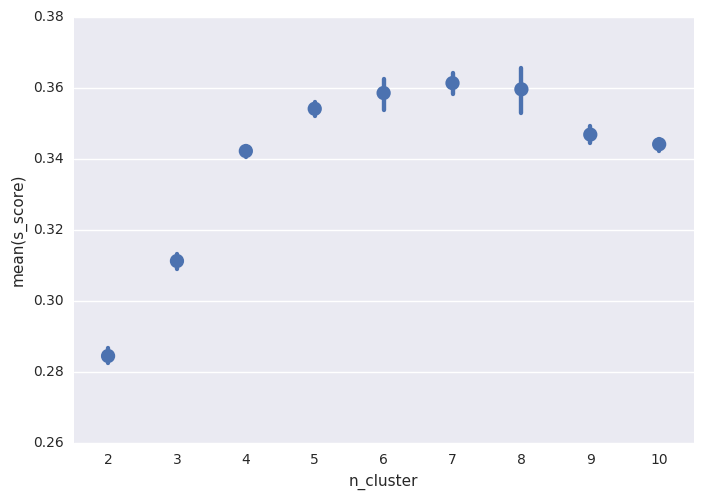

In [6]:
df = pd.DataFrame(data)
df.columns = ["s_score","n_cluster"]
Kmeans_new =sns.pointplot(x ="n_cluster",y ="s_score",data=df, join=False)
Kmeansplot = Kmeans_new.get_figure()
Kmeansplot.savefig("Kmeans.png")
        
print(data)

In [7]:
from sklearn.cluster import AgglomerativeClustering
data = []
for j in range(0,10):  
    X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_db = sc.fit_transform(X)
    for i in range(2,11):
        n_clusters = i
        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)        
        s_score = metrics.silhouette_score(X_db,labels)
        data.append ([s_score,i])
        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
          % s_score)
        


Number of clusters: 2
Silhouette Coefficient: 0.237
Number of clusters: 3
Silhouette Coefficient: 0.283
Number of clusters: 4
Silhouette Coefficient: 0.289
Number of clusters: 5
Silhouette Coefficient: 0.299
Number of clusters: 6
Silhouette Coefficient: 0.311
Number of clusters: 7
Silhouette Coefficient: 0.318
Number of clusters: 8
Silhouette Coefficient: 0.328
Number of clusters: 9
Silhouette Coefficient: 0.313
Number of clusters: 10
Silhouette Coefficient: 0.279
Number of clusters: 2
Silhouette Coefficient: 0.245
Number of clusters: 3
Silhouette Coefficient: 0.295
Number of clusters: 4
Silhouette Coefficient: 0.312
Number of clusters: 5
Silhouette Coefficient: 0.321
Number of clusters: 6
Silhouette Coefficient: 0.329
Number of clusters: 7
Silhouette Coefficient: 0.330
Number of clusters: 8
Silhouette Coefficient: 0.324
Number of clusters: 9
Silhouette Coefficient: 0.330
Number of clusters: 10
Silhouette Coefficient: 0.305
Number of clusters: 2
Silhouette Coefficient: 0.240
Number of 

[[0.23719654657126588, 2], [0.28345507685472965, 3], [0.28931544467955728, 4], [0.29865233436164929, 5], [0.3111919359903032, 6], [0.31821270807482277, 7], [0.32758775348283331, 8], [0.31313062734613845, 9], [0.27913214747425652, 10], [0.24468646925906765, 2], [0.29506645445355445, 3], [0.31152734048639397, 4], [0.32095129701963315, 5], [0.32942875432515123, 6], [0.32974305440646245, 7], [0.32361570903300568, 8], [0.32989300747988448, 9], [0.30470842859360026, 10], [0.23971489331814147, 2], [0.28982456180604543, 3], [0.30663493449311213, 4], [0.31276633810577525, 5], [0.31191480716931869, 6], [0.30342945380351916, 7], [0.31398554837147447, 8], [0.31843520829105676, 9], [0.31629282782981299, 10], [0.24901809877090827, 2], [0.29183646962751508, 3], [0.29278324368856318, 4], [0.30353192248514826, 5], [0.30611511229703114, 6], [0.30991091735142162, 7], [0.30148985107766652, 8], [0.30612253656182969, 9], [0.30835851582234075, 10], [0.24602529393595896, 2], [0.2928302360132401, 3], [0.305273

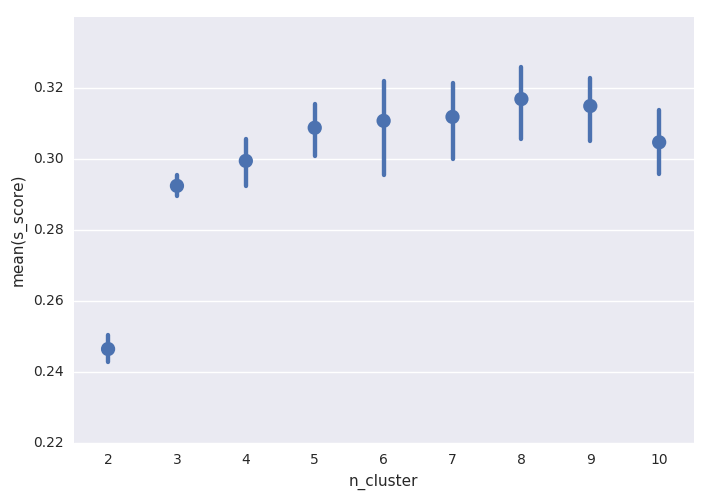

In [8]:
df = pd.DataFrame(data)
df.columns = ["s_score","n_cluster"]
Agg =sns.pointplot(x ="n_cluster",y ="s_score",data=df, join=False)
Aggplot = Agg.get_figure()
Aggplot.savefig("Agg.png")        
print(data)